# Исследование объявлений о продаже квартир


#### Вывод первых 10 строчек датафрейма data на экран

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Построение общей гистограммы для всех столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

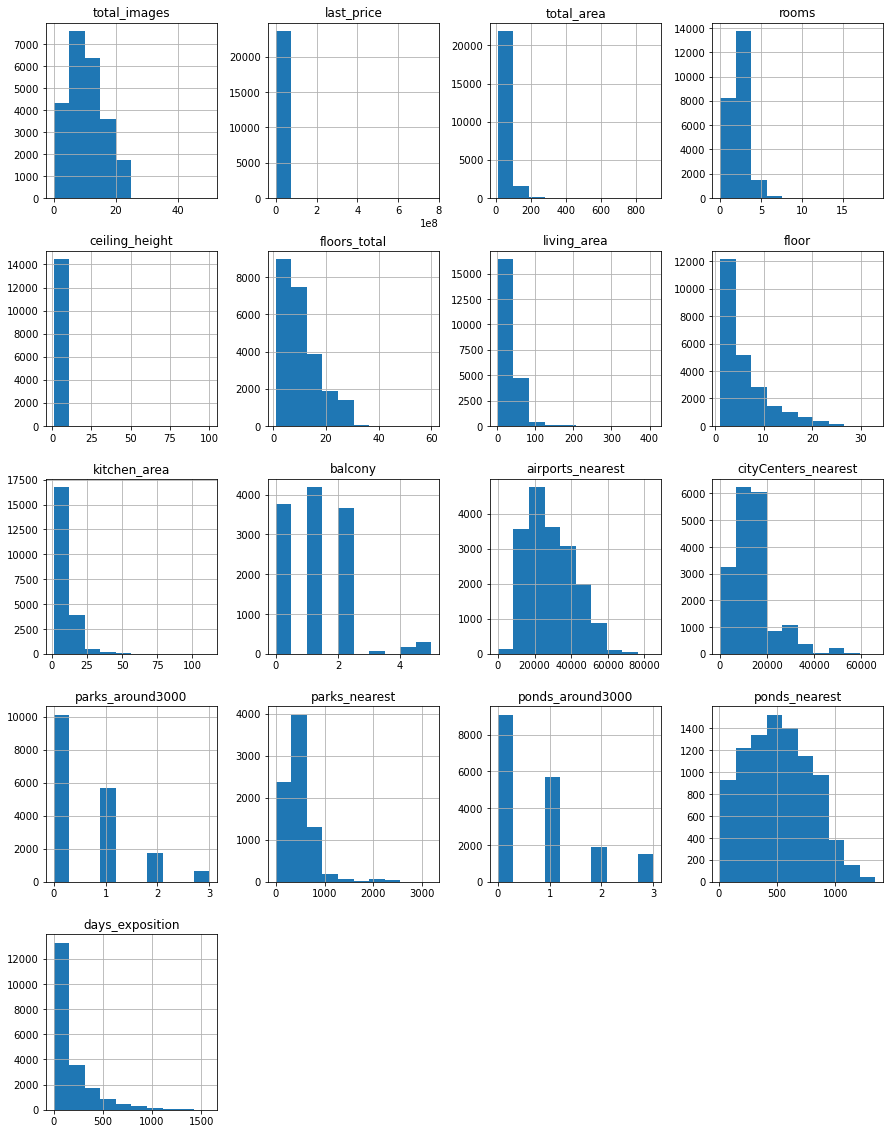

In [3]:
data.hist(figsize=(15, 20))

<div class="alert alert-block alert-info">При первом изучении данных на общей гистограмме "плохочитаемыми" можно признать гистограммы <i>Последняя цена (last_price)</i> и <i>Высота потолков (ceiling_height)</i>  - не ясно, что показывают данные графики. 
    <p>К подозрительным гистограммам на данном этапе относится <i>Ближайший аэропорт (airports_nearest)</i> с наличием значений, близких к нулю (находится ли недвижимость в аэропорту?), а также <i>Количество балконов (balcony)</i> больше четырех (необходимо проверить, не ошибка ли это для квартир определенной стоимость / площади; возможно, что такая недвижимость существует).
       <p>Видно, что данные содержат множество пропусков и аномалий
</div>

### Предобработка данных

#### Вывод основной информации о датафрейме data (использование метода info())

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Поиск, анализ и заполнение пропусков в данных

<div class="alert alert-block alert-info">Количество пропущенных значений для каждого столбца
</div>


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Столбцы, в которых пропуски удалить невозможно или требуются дополнительные данные

<div class="alert alert-block alert-info">В следующих столбцах пропуски оставим без изменений, вычислительными и статистическими методами эту информацию не получить:
    <li><b>Всего этажей (floors_total)</b> - в данных нет адреса, заполнить пропуск можно только по запросу к собственнику, возможно, эта информация не является важной для анализа
     <li><b> Название населённого пункта (locality_name)</b> - заполнить пропуск можно только по запросу к собственнику, при анализе зависимости, связанной с населенным пунктом, данные с пропуском будут исключены
     <li><b>Расстояние до ближайшего аэропорта в метрах (м) (airports_nearest)</b> - возможно заполнить, используя средние данные из совпадающих населенных пунктов, но других данных для стат.анализа достаточно, пропуски использовать не будем
     <li><b>Расстояние до центра города, парки и озера в округе (м) (cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest)</b> - в данных нет адреса, даже картографически данные заполнить не получится
      <li><b>Количество дней размещения объявления (days_exposition)</b> - Nan может означать, что объявление всё еще размещено
         
</div>

##### Удаление пропусков в столбцах Площадь кухни (kitchen_area), Жилая площадь (living_area) 

<div class="alert alert-block alert-info">Заполним пропуски площадей, расчитав отношение выбранной площади ко всей площади и умножив на этот коэффициент общую площадь в строках с пропусками </div>

In [6]:
# площадь кухни для студий заменим на 0
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0

# вычислим коэффициент отношения медианы kitchen_area к total_area
kitchen_area_koef = data['kitchen_area'].median() / data['total_area'].median()
# вычислим коэффициент отношения медианы living_area к total_area
living_area_koef = data['living_area'].median() / data['total_area'].median()

# заполним пропуски в столбце kitchen_area на kitchen_area_koef, умноженный на общую площадь данного объекта
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = kitchen_area_koef * data['total_area']
# заполним пропуски в столбце living_area на kitchen_area_koef, умноженный на общую площадь данного объекта
data.loc[data['living_area'].isna(), 'living_area'] = living_area_koef * data['total_area']

##### Удаление пропусков в столбце Апартаменты (is_apartment) (нужен допанализ?)

<div class="alert alert-block alert-info">Столбец Апартаменты (is_apartment) содержит 9882 пропусков данных. На первый взгляд Nan можно принять за "не апартаменты". Но так ли это? - В списке уникальных значений присутствуют и False, и True - как логические маркеры</div>

In [7]:
#уникальные значения столбца is_apartment
data['is_apartment'].unique()


array([nan, False, True], dtype=object)

In [8]:
#количество значений True и False без учета пропусков данных
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

<div class="alert alert-block alert-info">Заполненных данных 2725 для False и 50 для True - всего 12% от общего количества данных. На данном этапе с пропусками сделать "быстро" ничего нельзя - нужен анализ, который позволит охарактеризовать недвижимость как апартаменты или не апартаменты</div>

##### Удаление пропусков в столбце Балокны (balcony)

<div class="alert alert-block alert-info">Столбец Балконы (balcony ) содержит 11519 пропусков данных, вероятно, если балкона нет, продавец мог просто не заполнять этот пункт. Заменим все пропуски на нуль</div>

In [9]:
#поиск пропусков и замена их на 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

#проверка данных в столбце и анализ возможных значений
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

<div class="alert alert-block alert-info">При общем анализе гистограмм число балконов больше четырех вызывало подозрение, однако количественное представлении данных, где недвижимость с тремя балконами встречается реже, чем с четырьмя и пятью балконами, позволяет не включать в дальнейших анализ эту особенность </div>

##### Удаление дубликатов  в столбце Название населённого пункта (locality_name)

<div class="alert alert-block alert-info">В пункте 2.2 было найдено количество пропусков по этому столбцу - 49, восстановить пропущенные значения не представляется возможным, поэтому заменим пропуски на 'unknown'</div>

In [10]:
data.loc[data['locality_name'].isna(), 'locality_name'] = 'unknown' 

<div class="alert alert-block alert-info">Посмотрим на общую картину уникальных названий в этом столбце</div>

In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div class="alert alert-block alert-info">Основные различия, которые можно устранить сразу:
    <li>'посёлок' -> 'поселок' (буква ё будет заменена во всех упоминаниях посёлка, поэтому этот шаг должен быть первым)
    <li>'поселок при железнодорожной станции' -> 'поселок' (особой разницы нет) 
    <li>'поселок станции' -> 'поселок' (аналогично)
    <li>'коттеджный поселок' -> 'поселок' (аналогично + 'коттеджный поселок' встречается довольно редко)
    <li>'поселок городского типа' -> 'пгт' (сокращение общепринятого названия + не будет лишней путаницы)
    <li>'городской поселок' -> 'пгт' (согласно Вики это одно и то же)
    <li>'садоводческое некоммерческое товарищество' -> 'садовое товарищество' (аналоги, коммерческое или нет - в данном анализе не важно, но от деревни и поселка отличается)
    <li>'деревня Кудрово' -> 'Кудрово' (город с 2018 года)
    <li>'поселок Мурино' -> 'Мурино' (город с 2019 года)
</div>


In [12]:
# замена и объединение типов населенных пунктов
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'пгт')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'пгт')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
#Кудрово - город с 2018 года, есть смысл сразу сделать замену
data.loc[data['locality_name'] == 'деревня Кудрово', 'locality_name'] = 'Кудрово' 
#Мурино - город  с 2019, делаем замену сразу
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name'] = 'Мурино'

#заменим все буквы ё на е, чтобы избежать дуликатов, например, в названии "Фёдоровское"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')


<div class="alert alert-block alert-info">На следующем шаге отделим название населенного пункта от его типа, для этого создадим два новых столбца <i>locality_type</i> и <i>locality_simple_name</i> </div>

In [16]:
list_of_duplicate_locality_name(data, locality_simple_name_list)

[{'любань'},
 {'никольское'},
 {'федоровское'},
 {'гарболово', 'зимитицы', 'калитино', 'рабитицы', 'щеглово'},
 {'приладожский', 'рахья'},
 {'рябово'},
 {'павлово'}]

<div class="alert alert-block alert-info">Поскольку нам неизвестны типы населенных пунктов, а только повторы названий, дальнейший поиск дубликатов будет осуществляться вручную и по каждому отдельному пункту будет приниматься решение о замене (по материалам Википедии)</div>

In [17]:
#Любань - и город, и поселок - не исправляем
data.query('locality_simple_name == "любань"').groupby('locality_type')['locality_type'].count()


locality_type
город      8
поселок    3
Name: locality_type, dtype: int64

In [18]:
# есть город Никольское в Тосненском районе и село Никольское в Гатчине - не исправляем
data.query('locality_simple_name == "никольское"').groupby('locality_type')['locality_type'].count()

locality_type
город    93
село      1
Name: locality_type, dtype: int64

In [19]:
#Фёдоровское - пгт, исправляем деревню на пгт 
data.query('locality_simple_name == "федоровское"').groupby('locality_type')['locality_type'].count()

locality_type
деревня    8
пгт        7
Name: locality_type, dtype: int64

In [20]:
# условие для замены деревни Фёдоровское  на пгт Фёдоровское 
raws = (data['locality_simple_name'] == 'федоровское') & (data['locality_type'] == 'деревня')
# замена 
data.loc[raws, 'locality_type'] = 'пгт'

In [21]:
# Павлово: пгт - Кировский район, село - Всеволожский район - не исправляем
data.query('locality_simple_name == "павлово"').groupby('locality_type')['locality_type'].count()

locality_type
пгт     11
село     7
Name: locality_type, dtype: int64

In [22]:
# Рябово -  поселок; замена пгт на поселок
data.query('locality_simple_name == "рябово"').groupby('locality_type')['locality_type'].count()

locality_type
пгт        2
поселок    2
Name: locality_type, dtype: int64

In [23]:
# условие для замены пгт Рябово на поселок Рябово
raws = (data['locality_simple_name'] == 'рябово') & (data['locality_type'] == 'пгт')
# замена 
data.loc[raws, 'locality_type'] = 'поселок'

In [24]:
# Приладожский -  относится к пгт Приладожский, однако СТ и ПГТ - имеют  отличия, в том числе и нек.юридические, не исправляем
data.query('locality_simple_name == "приладожский"').groupby('locality_type')['locality_type'].count()

locality_type
пгт                     9
садовое товарищество    1
Name: locality_type, dtype: int64

In [25]:
# Рахья -  относится к пгт Рахья, однако СТ и ПГТ - имеют  отличия, в том числе и нек.юридические, не исправляем
data.query('locality_simple_name == "рахья"').groupby('locality_type')['locality_type'].count()

locality_type
пгт                     15
садовое товарищество     1
Name: locality_type, dtype: int64

In [26]:
# Гарболово -  деревня; замена поселка на деревню
data.query('locality_simple_name == "гарболово"').groupby('locality_type')['locality_type'].count()

locality_type
деревня    13
поселок     4
Name: locality_type, dtype: int64

In [27]:
# условие для замены поселка Гарболово на деревню Гарболово
raws = (data['locality_simple_name'] == 'гарболово') & (data['locality_type'] == 'поселок')
# замена
data.loc[raws, 'locality_type'] = 'деревня'

In [28]:
# Щеглово -  поселок; замена деревни на поселок
data.query('locality_simple_name == "щеглово"').groupby('locality_type')['locality_type'].count()

locality_type
деревня     1
поселок    23
Name: locality_type, dtype: int64

In [29]:
# условие для замены деревни Щеглово на поселок Щеглово
raws = (data['locality_simple_name'] == 'щеглово') & (data['locality_type'] == 'деревня')
# замена
data.loc[raws, 'locality_type'] = 'поселок'

In [30]:
#Калитино - есть и поселок, и деревня (расстояние между ними 500 м) - не исправляем
display('Калитино', data.query('locality_simple_name == "калитино"').groupby('locality_type')['locality_type'].count())

#Зимитицы - есть и поселок и деревня  - не исправляем
display('Зимитицы', data.query('locality_simple_name == "зимитицы"').groupby('locality_type')['locality_type'].count())

#Рабитицы - есть и поселок, и деревня - не исправляем
display('Рабитицы', data.query('locality_simple_name == "рабитицы"').groupby('locality_type')['locality_type'].count())


'Калитино'

locality_type
деревня    7
поселок    1
Name: locality_type, dtype: int64

'Зимитицы'

locality_type
деревня    1
поселок    3
Name: locality_type, dtype: int64

'Рабитицы'

locality_type
деревня    2
поселок    1
Name: locality_type, dtype: int64

<div class="alert alert-block alert-info">На последнем шаге проверим категории населенных пунктов </div>

In [31]:
data['locality_type'].value_counts()

город                   20863
поселок                  1553
деревня                   641
пгт                       556
unknown                    49
село                       32
садовое товарищество        5
Name: locality_type, dtype: int64

In [32]:
# Вернем названиям заглавную букву
data['locality_simple_name'] = data['locality_simple_name'].str.capitalize()
data.loc[data['locality_simple_name'] == 'Санкт-петербург', 'locality_simple_name'] = 'Санкт-Петербург'


##### Удаление аномалий в столбце Высота потолков(м) (ceiling_height)

<div class="alert alert-block alert-info">Изучим данные в этом столбце методом describe()</div>

In [33]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">Описательная статистика методом describe() даёт представление о том, что в данных присутствует аномальные минимальное (1 м) и максимальное (100 м).
<p>Заменим аномальные значения на NaN. Минимальная высота потолка в России установлена в 2.4 м, ниже - признаем аномальным</div>

In [34]:
# для замены на NaN воспользуемся библиотекой Numpy
import numpy as np
data.loc[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] == 100), 'ceiling_height'] = np.nan
data['ceiling_height'].describe()

count    14482.000000
mean         2.765908
std          0.968920
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">В данных всё еще присутствуют аномальные значения, например, 32 м - могло быть ошибкой и имелось ввиду 3.2 м. Высоту потолков, больших 24 м изменим, разделив на 10, а потолки свыше 10 м тоже заменим на NAN</div>

In [35]:
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data['ceiling_height']  / 10
data.loc[(data['ceiling_height'] > 10), 'ceiling_height'] = np.nan

In [36]:
data['ceiling_height'].isna().sum()

9221

<div class="alert alert-block alert-info">В данных всё еще много пропусков - 9221. Найдем медианные значения высоты потолков в зависимости от количества этажей в здании</div>

In [37]:
ceiling_height_pt = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')
ceiling_height_pt.head(5)

,ceiling_height
floors_total,
1.0,2.90
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55


In [38]:
# заполним пропущенные значения высоты потолков согласно сводной таблице медианных значений
k = 1
for value in ceiling_height_pt.items():
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = value[1][k]
    k += 1
    
# описательная статистика обновленных данных
data['ceiling_height'].describe()

count    23699.000000
mean         2.795503
std          0.242800
min          2.400000
25%          2.600000
50%          2.900000
75%          2.900000
max          8.300000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">Пропуски в данных после ликвидации аномальных и ошибочных значений были заменены на медианное значение высоты потолков в зависимости от этажности. Показатели выборки улучшились: минимальное 2.4 м, максимальное 8.3 м и среднее  2.8 м значения стали "реальными", а маленькое стандартное отклонение 0.24 указывает на однородность данных. В данных остались потолки свыше 5 м - возможно, это может быть элитная или историческая недвижимость, характерная для Санкт-Петербурга. </div>

##### Удаление аномалий в столбце airports_nearest

<div class="alert alert-block alert-info">На общей гистограмме было видно, что для некоторой недвижимости расстояние до аэропорта равно нулю. Признаем это аномалией и заменим данное расстояние на NaN. Мне не удалось найти САНПИН с минимальным расстоянием от аэропорта до жилых домов, возможно, аномальных значений тогда было бы больше (принимаю это число, равное 5000 м)</div>

In [39]:
data.loc[(data['airports_nearest'] < 5000), 'airports_nearest'] = np.nan

##### Изменение типов данных

<div class="alert alert-block alert-info">В следующих столбцах необходимо изменить тип данных для улучшения восприятия:
    <li><b>first_day_exposition</b> - оставим от даты только Год-Месяц-День
    <li><b>last_price</b> - последнюю цену представим в виде миллионов
    <li><b>airports_nearest</b> - расстояние переведено в км
    <li><b>parks_around3000, ponds_around3000, floors_total, balcony, days_exposition</b> - выразим целым числом
        </div>

In [40]:
# преобразование даты в формат '%Y-%m-%d'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

# цену на момент снятия с публикации выразим в млн.
data['last_price'] = data['last_price'] / 1_000_000

# расстояние до аэропорта выразим в км
data['airports_nearest'] = data['airports_nearest'] / 1_000

# тип float переведем в int для натуральных значений
data['parks_around3000'] = data['parks_around3000'].convert_dtypes()
data['ponds_around3000'] = data['ponds_around3000'].convert_dtypes()
data['days_exposition'] = data['days_exposition'].convert_dtypes('int64')
data['floors_total'] = data['floors_total'].convert_dtypes()
data['balcony'] = data['balcony'].convert_dtypes()

#вывод на экран
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,locality_simple_name
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,0,18.863,16028.0,1,482.0,2,755.0,<NA>,город,Санкт-Петербург
1,7,3.350,40.4,2018-12-04,1,2.90,11,18.600000,1,NaN,...,2,12.817,18603.0,0,NaN,0,NaN,81.0,поселок,Шушары
2,10,5.196,56.0,2015-08-20,2,2.90,5,34.300000,4,NaN,...,0,21.741,13933.0,1,90.0,2,574.0,558.0,город,Санкт-Петербург
3,0,64.900,159.0,2015-07-24,3,2.90,14,91.730769,9,NaN,...,0,28.098,6800.0,2,84.0,3,234.0,424.0,город,Санкт-Петербург
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,0,31.856,8098.0,2,112.0,1,48.0,121.0,город,Санкт-Петербург


In [41]:
# дополнительные аномалии, найденные позже в разделе 4

# цена продажи 12 190 - ошибка
data.loc[(data['last_price'] == 0.01219), 'last_price'] = 12.19

# этажность зданий больше 40 - ошибка (пояснение в разделе 4)
    # 60 этажей заменяем на 6
data.loc[(data['floors_total'] == 60), 'floors_total'] = 6 
    # 52 этажа скорее всего имелось ввиду 25, т.к. недвижимость расположена на 18 этаже
data.loc[(data['floors_total'] == 52), 'floors_total'] = 25


### Добавление в таблицу новых столбцы

In [42]:
# цена одного квадратного метра
data['one_meter_price'] = round(data['last_price'] / data['total_area'] * 1_000_000, 2)

# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek

# месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»)
# функция для определния типа этажа
def floor_type(raws):
    try:
        if raws['floor'] == 1:
            return 'первый'
        elif raws['floor'] == raws['floors_total']:
            return 'последний'
        elif raws['floor'] < raws['floors_total']:
            return 'другой'
    except:
        pass
    
# применение функции floor_type
data['flat_floor_type'] = data.apply(floor_type, axis=1)

# расстояние до центра города в километрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

### Исследовательский анализ данных

#### Изучение параметров объектов

##### Общая площадь

<div class="alert alert-block alert-info">Описательная статистика покажет минимальное, максимальное и среднее значения.  </div>

In [43]:
data['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [44]:
data.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
19540,8,420.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,318.0,106.0,город,Санкт-Петербург,466666.67,2,12,2017,последний,8.0


<div class="alert alert-block alert-info"> Построим гистограмму для столбца total_area</div>

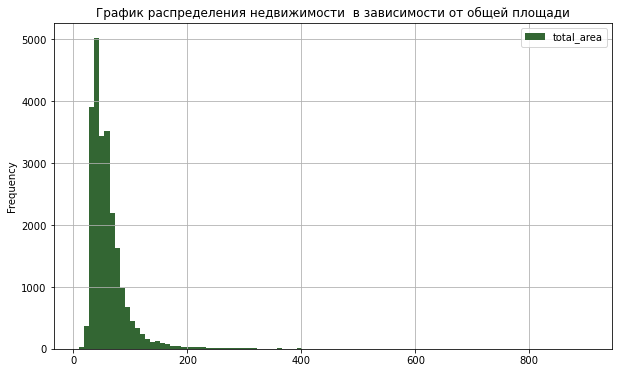

In [45]:
ax = data.plot(
    kind='hist',
    y='total_area',
    range=(10, 900),
    bins=100,
    title='График распределения недвижимости  в зависимости от общей площади',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)


<div class="alert alert-block alert-info"> Гистограмма показывает данные в пяти интервалах от 0 кв.м до 900 кв.м, ширина каждого интервала составляет 200 кв.м. Форма гистограммы отличается от нормального распределения, у которого симметричная форма колокола с пиком посередине. Хвост тянется далеко вправо и сообщает о том, что существует недвижимость, общая площадь которой превышает 200 кв.м.
<p>Рассмотрим такую недвижимость более детально, чтобы оценить ее количественно</div>

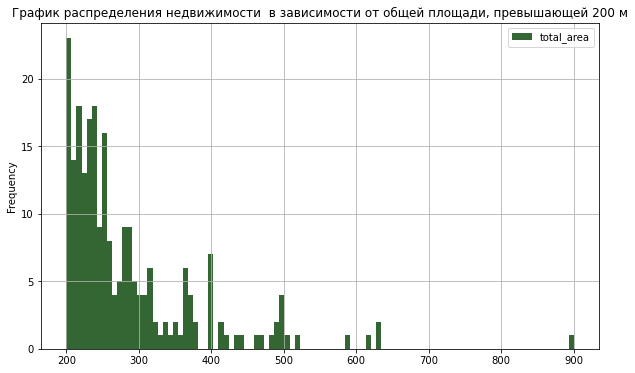

In [46]:
ax = data.plot(
    kind='hist',
    y='total_area',
    range=(200, 900),
    bins=100,
    title='График распределения недвижимости  в зависимости от общей площади, превышающей 200 м',
    grid=True,
    figsize=(10, 6), color='#336633'    
)

In [47]:
# топ5 cамых больших по площади объектов недвижимости
data.sort_values(by="total_area", ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
19540,8,420.0,900.0,2017-12-06,12,2.8,25,409.700000,25,NaN,...,318.0,106.0,город,Санкт-Петербург,466666.67,2,12,2017,последний,8.0
12859,20,140.0,631.2,2019-04-09,7,3.9,4,322.300000,4,NaN,...,210.0,<NA>,город,Санкт-Петербург,221799.75,1,4,2019,последний,5.0
3117,19,140.0,631.0,2019-03-30,7,2.9,5,364.038462,5,NaN,...,210.0,<NA>,город,Санкт-Петербург,221870.05,5,3,2019,последний,5.0
15651,20,300.0,618.0,2017-12-18,7,3.4,7,258.000000,5,NaN,...,198.0,111.0,город,Санкт-Петербург,485436.89,0,12,2017,другой,5.0
5358,20,65.0,590.0,2019-02-14,15,3.5,6,409.000000,3,NaN,...,NaN,14.0,город,Санкт-Петербург,110169.49,3,2,2019,другой,5.0


In [48]:
# топ5 cамых маленьких по площади объектов недвижимости
data.sort_values(by="total_area", ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
19904,4,2.400,12.0,2017-07-19,1,2.55,5,10.000000,2,NaN,...,45.0,200.0,город,Санкт-Петербург,200000.00,2,7,2017,другой,1.0
17961,3,1.400,13.0,2017-12-03,1,2.60,9,7.500000,1,NaN,...,185.0,410.0,город,Санкт-Петербург,107692.31,6,12,2017,первый,16.0
19546,3,1.850,13.0,2019-03-11,1,3.40,5,7.500000,2,False,...,NaN,24.0,город,Санкт-Петербург,142307.69,0,3,2019,другой,5.0
19807,0,3.800,13.0,2018-07-04,1,2.90,5,10.000000,3,NaN,...,27.0,9.0,город,Санкт-Петербург,292307.69,2,7,2018,другой,1.0
19558,2,1.686,13.2,2018-12-17,1,2.90,5,7.615385,1,NaN,...,155.0,19.0,город,Санкт-Петербург,127727.27,0,12,2018,первый,4.0


<div class="alert alert-block alert-info">Введение переменной <b>data_clear_estate</b>, которая будет содержать очищенные от выбросов данные</div>

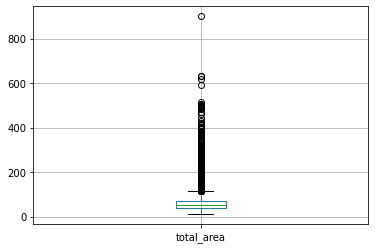

In [49]:
# диаграмма размаха по общей площади
data.boxplot('total_area')

# оставляем данные с нормальным распределением, общей площадью менее 100 кв.м
data_clear_estate = data.query('total_area < 100')

<AxesSubplot:>

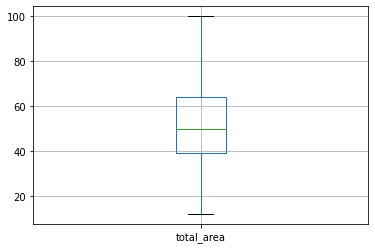

In [50]:
# диаграмма размаха по общей площади (очищенные данные)
data_clear_estate.boxplot('total_area')

In [51]:
data_clear_estate['total_area'].describe()

count    21791.000000
mean        52.773804
std         17.366386
min         12.000000
25%         39.000000
50%         49.700000
75%         64.000000
max         99.900000
Name: total_area, dtype: float64

<div class="alert alert-block alert-info"><B>Выводы</b>
    <p><b><i>Общие данные</i></b>
<p><i>Минимальная общая площадь 12 кв.м
<p>Максимальная общая площадь 900 кв.м
<p>Средняя площадь 60 кв.м
<p>75% данных имею общую площадь, меньшую 69.9 кв.м
<p>Медиана 52 кв.м
<p>Стандартное отклонение 35.7 кв.м - очень неоднородные данные
<p>Пять наибольших по площади помещений расположены в Санкт-Петербурге, насчитывают семь и более комнат
<p>Пять наименьших по площади помещений расположены в Санкт-Петербурге, насчитывают одну комнату, расположены преимущественно в центре (возможно комнаты в коммунальных квартирах)</i>

<br>
<p><b>Нормальными параметрическими данными будем считать данные: общая площадь от 12 до 100 кв.м со средним значением 52.8 кв.м (медиана 49.7).</b> <p>Рассматривать далее будем датасет data_clear_estate

    
</div>


##### Жилая площадь

<div class="alert alert-block alert-info">Описательная статистика и медианное значение для столбца 'living_area' </div>

In [52]:
data_clear_estate['living_area'].describe()

count    21791.000000
mean        30.157321
std         12.236538
min          2.000000
25%         18.500000
50%         29.010000
75%         39.000000
max         88.000000
Name: living_area, dtype: float64

<div class="alert alert-block alert-info"> Построим гистограмму для столбца living_area</div>

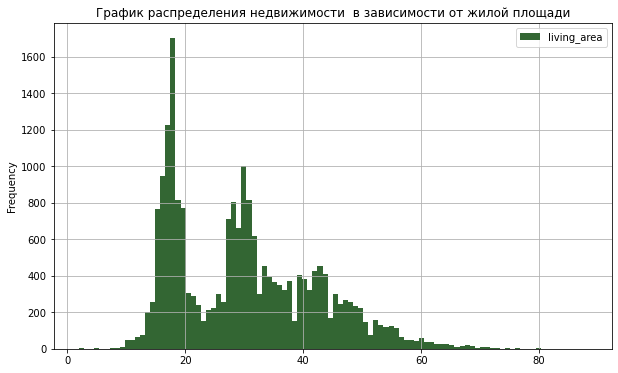

In [53]:
ax = data_clear_estate.plot(
    kind='hist',
    y='living_area',
    range=(2, 88),
    bins=100,
    title='График распределения недвижимости  в зависимости от жилой площади',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info"> В гистограмме присутствует намек на нормальное распределение, однако наблюдается пик в 18 кв. м для жилой площади, возможно, свою роль играют студии. Жилую площадь менее 10 кв.м признаем аномальной и исключим из данных из человеческих соображений</div>

In [54]:
# оставляем данные с жилой площадью, большей 10 кв. м
data_clear_estate = data_clear_estate.query('living_area > 10')

#проверим описательную статистику
data_clear_estate['living_area'].describe()

count    21728.000000
mean        30.219000
std         12.200037
min         10.080000
25%         18.500000
50%         29.200000
75%         39.000000
max         88.000000
Name: living_area, dtype: float64

In [55]:
# топ5 объектов недвижимости с наибольшей жилой площадью
data_clear_estate.sort_values(by="living_area", ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
424,14,11.50,98.0,2016-05-10,3,2.65,3,88.0,3,False,...,NaN,90.0,город,Санкт-Петербург,117346.94,1,5,2016,последний,13.0
8211,8,13.00,93.0,2015-02-19,3,2.90,16,82.0,4,False,...,241.0,516.0,город,Санкт-Петербург,139784.95,3,2,2015,другой,7.0
15004,0,35.00,90.0,2018-08-22,3,2.90,7,80.0,6,NaN,...,656.0,16.0,город,Санкт-Петербург,388888.89,2,8,2018,другой,4.0
11424,9,6.65,94.0,2018-12-12,3,2.90,10,80.0,4,NaN,...,NaN,<NA>,город,Мурино,70744.68,2,12,2018,другой,NaN
3314,20,16.55,96.0,2018-02-16,6,2.60,5,80.0,3,NaN,...,183.0,108.0,город,Санкт-Петербург,172395.83,4,2,2018,другой,1.0


In [56]:
# топ5 объектов недвижимости c наибольшей общей площадью
data_clear_estate.sort_values(by="total_area", ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
8035,19,9.500000,99.90,2019-04-23,3,2.80,4,57.634615,2,NaN,...,NaN,7.0,город,Сестрорецк,95095.10,1,4,2019,другой,36.0
15255,5,13.986000,99.90,2018-02-13,3,3.00,17,53.350000,3,NaN,...,196.0,383.0,город,Санкт-Петербург,140000.00,1,2,2018,другой,10.0
16562,17,35.107000,99.88,2016-06-23,3,2.90,8,57.510000,7,NaN,...,473.0,22.0,город,Санкт-Петербург,351491.79,3,6,2016,другой,7.0
1389,2,11.634919,99.70,2018-10-10,3,2.72,18,54.700000,11,NaN,...,NaN,191.0,город,Санкт-Петербург,116699.29,2,10,2018,другой,7.0
23033,10,12.500000,99.60,2018-07-12,3,2.70,10,50.200000,6,NaN,...,580.0,<NA>,город,Санкт-Петербург,125502.01,3,7,2018,другой,14.0


<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальная жилая площадь 10 кв.м
<p>Максимальная жилая площадь 88 кв.м
<p>Средняя жилая площадь 30.2 кв.м
<p>75% данных имею жилую площадь, меньшую 39 кв.м
<p>Медиана 29.2 кв.м
<p>Стандартное отклонение 12.4 кв. м - неоднородные данные
<p>Наибольшие жилые площади не всегда соответствуют наибольшим по площади помещениям</i>

<p><b>Нормальными параметрическими данными будем считать данные: жилая площадь от 10 до 88 кв.м со средним значением 30.2 кв.м (медиана 29.2).</div>

##### Площадь кухни

<div class="alert alert-block alert-info">Описательная статистика и медианное значение для столбца 'kitchen_area' </div>

In [57]:
data_clear_estate['kitchen_area'].describe()

count    21728.000000
mean         9.507323
std          4.002768
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

<div class="alert alert-block alert-info"> Построим гистограмму для столбца kitchen_area</div>

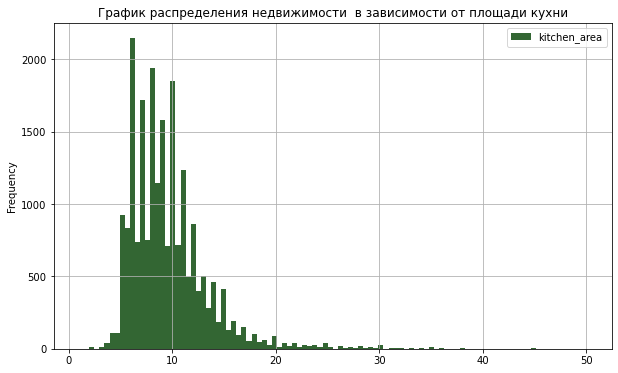

In [58]:
ax = data_clear_estate.plot(
    kind='hist',
    y='kitchen_area',
    range=(1, 50),
    bins=100,
    title='График распределения недвижимости  в зависимости от площади кухни',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)


<div class="alert alert-block alert-info"> Гистограмма показывает данные около 0, на что влияет наличие студий в данных. Описательная статистика выглядит неплохо - стандартное отклонение 3.9 не свидетельствует о большом разбросе данных относительного среднего, максимальное значение - 50 кв.м возможно для евро-кухонь, совмещенных с гостинной</div>

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальная площадь кухни 1.3 кв.м
<p>Максимальная площадь кухни 50 кв.м
<p>Средняя площадь кухни 9.6 кв.м
<p>75% данных имею площадь кухни, меньшую 11 кв.м
<p>Медиана 9 кв.м
<p>Стандартное отклонение 3.9 кв. м - неоднородные данные
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: площадь кухни от 1.3 до 50 кв.м со средним значением 9.6 кв. м (медиана 9 кв. м).
</div>

##### Цена объекта

<div class="alert alert-block alert-info">Описательная статистика для столбца 'last_price' </div>

In [59]:
data_clear_estate['last_price'].describe()

count    21728.000000
mean         5.068338
std          2.939376
min          0.430000
25%          3.300000
50%          4.450000
75%          6.050000
max         53.000000
Name: last_price, dtype: float64

<div class="alert alert-block alert-info"> Проверим минимальные значения</div>

In [60]:
# Объекты, дешевле 500_000 руб.
data_clear_estate.query('last_price < 0.5').sort_values('one_meter_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_simple_name,one_meter_price,day_of_week_exposition,month_exposition,year_exposition,flat_floor_type,cityCenters_nearest_km
14911,5,0.43,54.0,2018-06-26,2,2.90,3,31.153846,3,NaN,...,NaN,44.0,поселок,Свирь,7962.96,1,6,2018,последний,NaN
9581,7,0.45,43.4,2018-08-31,2,2.90,5,30.300000,3,NaN,...,NaN,96.0,деревня,Старополье,10368.66,4,8,2018,другой,NaN
23484,11,0.47,44.5,2018-07-02,2,2.90,2,28.000000,2,NaN,...,NaN,298.0,город,Сланцы,10561.80,0,7,2018,последний,NaN
5698,7,0.45,42.0,2017-07-31,2,2.90,1,23.000000,1,NaN,...,NaN,233.0,пгт,Будогощь,10714.29,0,7,2017,первый,NaN
16274,18,0.44,40.0,2018-07-10,1,2.90,5,23.076923,1,NaN,...,NaN,45.0,деревня,Старополье,11000.00,1,7,2018,первый,NaN
18867,1,0.47,41.0,2018-02-11,1,2.90,5,32.000000,3,NaN,...,NaN,46.0,деревня,Выскатка,11463.41,6,2,2018,другой,NaN
16219,14,0.45,38.5,2018-07-11,2,2.65,2,22.211538,1,NaN,...,NaN,45.0,деревня,Вахнова кара,11688.31,2,7,2018,первый,NaN
6859,6,0.49,40.0,2017-12-11,1,2.90,5,23.076923,3,NaN,...,NaN,43.0,деревня,Старополье,12250.00,0,12,2017,другой,NaN
17676,0,0.45,36.5,2018-02-01,1,2.90,5,17.300000,4,NaN,...,NaN,120.0,деревня,Ям-тесово,12328.77,3,2,2018,другой,NaN
21912,0,0.47,37.0,2018-02-18,1,2.90,3,21.346154,3,NaN,...,NaN,45.0,поселок,Совхозный,12702.70,6,2,2018,последний,NaN


<div class="alert alert-block alert-info"> Низкая цена характерна для сельской местности, цена за 1 кв. м - адекватная</div>

<div class="alert alert-block alert-info"> Построим гистограмму для столбца 'last_price'</div>

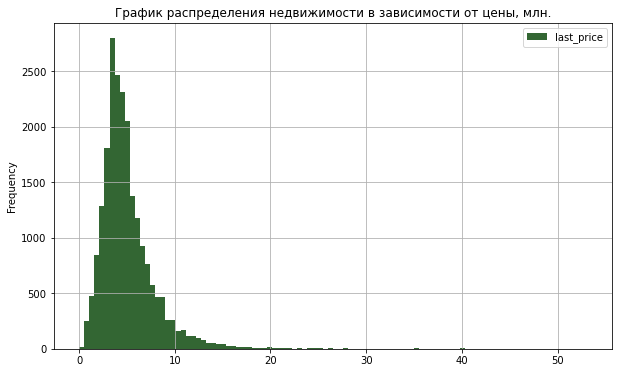

In [61]:
ax = data_clear_estate.plot(
    kind='hist',
    y='last_price',
    range=(0, 53),
    bins=100,
    title='График распределения недвижимости в зависимости от цены, млн.',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info"> Гистограмма стремится к нормальному распределению, при наличии длинного хвоста. Построим диаграмму размаха</div>

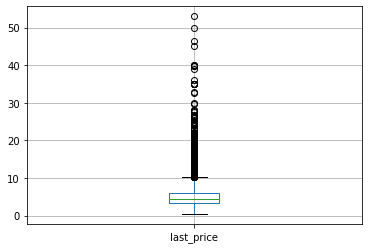

In [62]:
# диаграмма размаха по цене
data_clear_estate.boxplot('last_price')

# оставляем данные с нормальным распределением + меньше 20 млн.рубл.
data_clear_estate = data_clear_estate.query('last_price <= 20')

<AxesSubplot:>

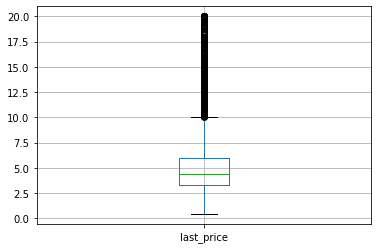

In [63]:
# диаграмма размаха по цене, обновленные данные
data_clear_estate.boxplot('last_price')

In [64]:
# описательная статисткика
data_clear_estate['last_price'].describe()

count    21656.000000
mean         4.993454
std          2.604910
min          0.430000
25%          3.300000
50%          4.437500
75%          6.000000
max         20.000000
Name: last_price, dtype: float64

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальная цена 0.43 млн. рублей = 430_000 руб.
<p>Максимальная цена 20 млн. руб.
<p>Средняя цена 5 млн.руб.
<p>75% данных покрывает 6 млн. руб.
<p>Медиана 4.45 млн. руб.
<p>Стандартное отклонение 2.57 млн. руб.
<p> На гистограммах видно, что недвижимость стоимостью менее 1 млн. руб. также мало популярна, как и недвижимость свыше 15 млн: если популярность второй низкая из-за высокой цены, то популярность первой, вероятно, из-за метража.
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: стоимость недвижимости от 0.43 до 20 млн. руб. со средним значением 5 млн. руб. (медиана 4.45 млн. руб).</div>

##### Количество комнат

<div class="alert alert-block alert-info">Описательная статистика для столбца 'rooms' </div>

In [65]:
data_clear_estate['rooms'].describe()

count    21656.000000
mean         1.907185
std          0.868799
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'rooms' </div>

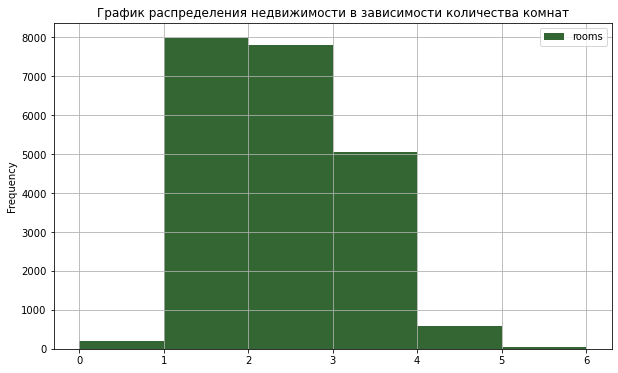

In [66]:
ax = data_clear_estate.plot(
    kind='hist',
    y='rooms',
    range=(0, 6),
    bins=6,
    title='График распределения недвижимости в зависимости количества комнат',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">Видно, что самая распространенная недвижимость имеет 2 и 3 комнаты. 
 <p>0 - студия, 5 комнат - редкость, оставим комнаты, не превышающие четырех </div>

In [67]:
# оставляем данные с количеством комнат до 4 включительно
data_clear_estate = data_clear_estate.query('rooms <= 5')

In [68]:
data_clear_estate['rooms'].describe()

count    21652.000000
mean         1.906429
std          0.867096
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальное количество комнат - 0 (студия)
<p>Максимальное количество комнат - 4
<p>Среднее количество комнат - 2
<p>75% недвижимости имеют 3 комнаты
<p>Медиана - 2 комнаты
<p>Стандартное отклонение - 0.86 комната 
<p> Самой популярной недвижимостью является та, которая насчитывает 2 и 3 комнаты, студии (0 комнат) покупают также редко, как недвижимостью с пятью и более комнатами.
</i>
  <p><b>Нормальными параметрическими данными будем считать данные: количество комнат от 0 до 5, со средним значением и медианой 2 комнаты.</div>

##### Высота потолков

<div class="alert alert-block alert-info">Описательная статистика для столбца 'ceiling_height' </div>

In [69]:
data_clear_estate['ceiling_height'].describe()

count    21652.000000
mean         2.773757
std          0.220135
min          2.400000
25%          2.600000
50%          2.800000
75%          2.900000
max          8.300000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'ceiling_height' </div>

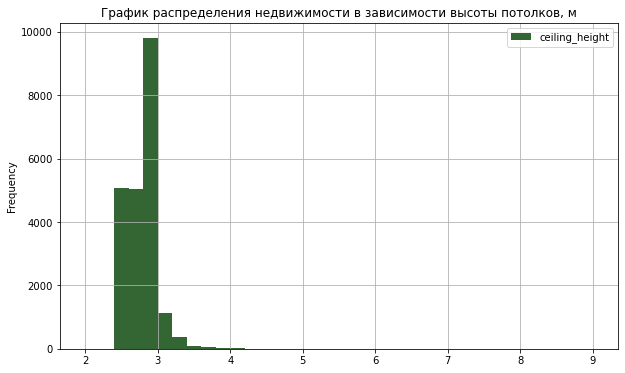

In [70]:
ax = data_clear_estate.plot(
    kind='hist',
    y='ceiling_height',
    range=(2, 9),
    bins= 35,
    title='График распределения недвижимости в зависимости высоты потолков, м',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">На гистограмме видны несколько пиков, указывающих на самые распространенные метражи высот потолка. Построим гистограмму для "хвоста", чтобы оценить количество редких значений</div>

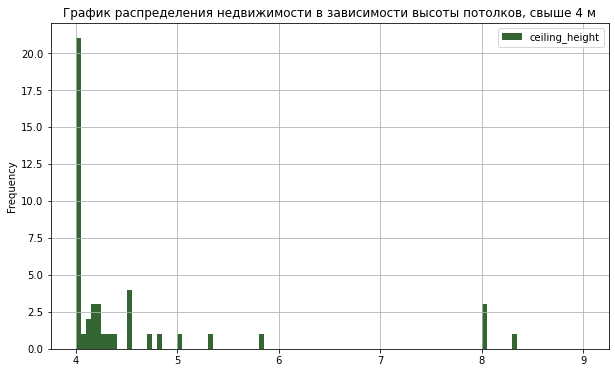

In [71]:
ax = data_clear_estate.plot(
    kind='hist',
    y='ceiling_height',
    range=(4, 9),
    bins=100,
    title='График распределения недвижимости в зависимости высоты потолков, свыше 4 м',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">Данные с высотой потолков свыше 6 м признаем аномальными и отбросим</div>

In [72]:
# оставляем данные высотой потолков менее 5 м
data_clear_estate = data_clear_estate.query('ceiling_height < 6')

In [73]:
data_clear_estate['ceiling_height'].describe()

count    21648.000000
mean         2.772778
std          0.208017
min          2.400000
25%          2.600000
50%          2.800000
75%          2.900000
max          5.800000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальная высота потолка - 2.4 м
<p>Максимальная высота потолка - 5.8 м
<p>Средняя высота потолка - 2.77 м
<p>75% недвижимости имеют потолки, не превышающие 2.9 м
<p>Медиана - 2.8 м
<p>Стандартное отклонение - 0.2 м - данные однородны 
<p>На гистограмме можно увидеть несколько распространённых значений для высоты потолка, но и потолки свыше 4 м встречаются неоднократно (такие значения может иметь элитная или историческая недвижимость)
</i>
<p><b>Нормальными параметрическими данными будем считать данные: высота потолков от 2.4 до 5.8 м, со средним значением 2.77 м и медианой 2.8 м</b>.</div>

##### Этаж квартиры

<div class="alert alert-block alert-info">Описательная статистика для столбца 'floor' </div>

In [74]:
data_clear_estate['floor'].describe()

count    21648.000000
mean         5.918099
std          4.905528
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         31.000000
Name: floor, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'floor' </div>

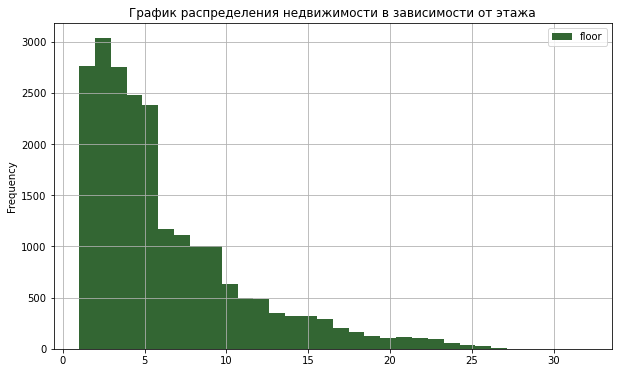

In [75]:
ax = data_clear_estate.plot(
    kind='hist',
    y='floor',
    range=(1, 32),
    bins=32,
    title='График распределения недвижимости в зависимости от этажа',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальный этаж - первый
<p>Максимальный этаж - 31
<p>Среднее значение этажа - 5 / 6 (пятиэтажные дома "хрущёвки" очень распространены)
<p>75% квартир расположены не выше 8 этажа
<p>Медиана - 4 этажа
<p>Стандартное отклонение - 4.88
<p>Гистограмма указывает, что недвижимость на втором / третьем этаже является предпочтительнее, а распространённость первого этажа может означать одноэтажность недвижимости
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: этаж квартиры от 1 до 33, со средним значением 6  и медианой 4 этажей</b>.
</div>

##### Тип этажа квартиры («первый», «последний», «другой»)

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'flat_floor_type' </div>

<AxesSubplot:>

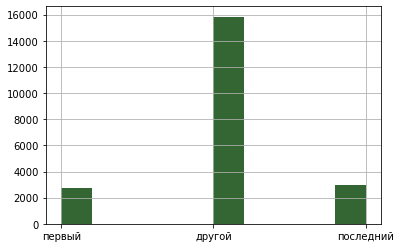

In [76]:
data_clear_estate['flat_floor_type'].hist(color='#336633')

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Первый и последний этаж встречаются примерно одинаково редко, наиболее распространёнными являются этажи категории Другие
</i></div>

##### Общее количество этажей в доме

<div class="alert alert-block alert-info">Описательная статистика для столбца 'floors_total' </div>

In [77]:
data_clear_estate['floors_total'].describe()

count    21577.000000
mean        10.798072
std          6.612925
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

<div class="alert alert-block alert-info">* Максимальное значение - 60 этажей, найдено при первом применении метода describe() и не было замечено ранее. Используя data.query('floors_total == 60') была найдена недвижимость ценой 3.8 млн. руб., что явно указывает на ошибку (в Спб и ЛО небоскребов нет; Лахта-центр 35 - этажей, БЦ "Лидер Тауэр" - 40 этажей, ЖК "Князь Александр Невский" - 37 этажей - самые высотные здания Спб)
Отобрав данные data.query('floors_total > 40') была найдена еще одна аномалия.
Эти аномалии будут исправлены в разделе 2, здесь останется информация о находке.</div>

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'floors_total' </div>

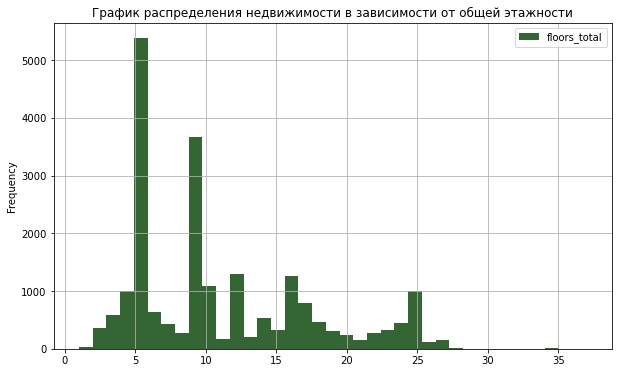

In [78]:
ax = data_clear_estate.plot(
    kind='hist',
    y='floors_total',
    range=(1, 37),
    bins=37,
    title='График распределения недвижимости в зависимости от общей этажности',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

In [79]:
# оставляем данные с общей этажносностью, меньшей 30
data_clear_estate = data_clear_estate.query('floors_total < 30', engine='python')
# описательная статистика по обновленным данным
data_clear_estate['floors_total'].describe()

count    21550.000000
mean        10.767564
std          6.560593
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

<div class="alert alert-block alert-info"><B>Выводы</b>
<p><i>Минимальное количество этажей - 1
<p>Максимальное количество этажей - 26
<p>Среднее значение количества этажей - 10
<p>75% недвижимости ниже 16 этажей
<p>Медиана - 9 этажей
<p>Стандартное отклонение - 6.4
<p>Гистограмма указывает, что самая распространенная этажность домов - 5 и 9 этажей, в данных также встречается недвижимость свыше 30 этажей
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: общее количество этажей от 1 до 29, со средним значением 10 и медианой 9 этажей</b>.
</div>

##### Расстояние до центра города в метрах

<div class="alert alert-block alert-info">Описательная статистика для столбца 'cityCenters_nearest' </div>

In [80]:
data_clear_estate['cityCenters_nearest'].describe()

count    16140.000000
mean     14830.032404
std       8488.574167
min        208.000000
25%      10430.000000
50%      13495.000000
75%      16596.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'cityCenters_nearest' </div>

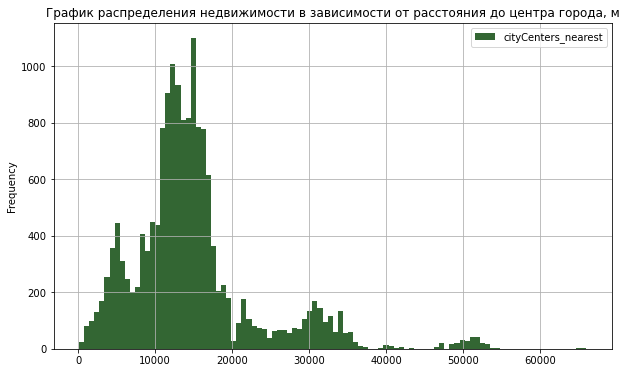

In [81]:
ax = data_clear_estate.plot(
    kind='hist',
    y='cityCenters_nearest',
    range=(100, 66000),
    bins=100,
    title='График распределения недвижимости в зависимости от расстояния до центра города, м',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">Рассматриваемы регион Спб и ЛО, таким образом расстояние до центра города - не совсем удачная характеристика (какой центр и какого города имеется ввиду?). Выделим город Санкт-Петербург и рассмотрим расстояние до его центра</div>


In [82]:
# отбор данных по Спб
cityCenters_nearest_spb = data_clear_estate.query('locality_simple_name == "Санкт-Петербург"')
# описательная статистика
cityCenters_nearest_spb['cityCenters_nearest'].describe()

count    13739.000000
mean     12141.226072
std       4541.609167
min        208.000000
25%       9580.000000
50%      12639.000000
75%      15130.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

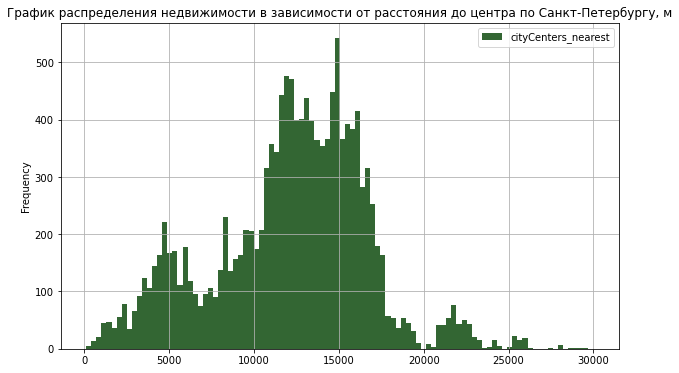

In [83]:
# построение гистограммы по Спб до центра города
ax = cityCenters_nearest_spb.plot(
    kind='hist',
    y='cityCenters_nearest',
    range=(100, 30000),
    bins=100,
    title='График распределения недвижимости в зависимости от расстояния до центра по Санкт-Петербургу, м',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

In [84]:
cityCenters_nearest_spb['cityCenters_nearest'].describe()

count    13739.000000
mean     12141.226072
std       4541.609167
min        208.000000
25%       9580.000000
50%      12639.000000
75%      15130.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

<div class="alert alert-block alert-info"><b>Выводы (по срезу для Санкт-Петербурга)</b>
<p><i>Минимальное расстояние до центра - 208 м
<p>Максимальное расстояние до центра - 29.5 км
<p>Среднее расстояние до центра - 12 км
<p>75% недвижимости находится не далее, чем в 15 км от центра
<p>Медиана - 12.6 км
<p>Гистограмма указывает, что наибольшее число недвижимости находится в пределах 18 км от центра.
       <p><b>Нормальными параметрическими данными будем считать данные: расстояние до центра от 208 м до 29493 м (по Сантк-Петербургу), со средним значением 12.1 км и медианой 12.6 км </b>. 
</i></div>

##### Расстояние до ближайшего аэропорта

<div class="alert alert-block alert-info">Описательная статистика для столбца 'airports_nearest' </div>

In [85]:
data_clear_estate['airports_nearest'].describe()

count    16125.000000
mean        28.916401
std         12.941918
min          6.450000
25%         18.055000
50%         27.203000
75%         37.625000
max         84.869000
Name: airports_nearest, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'airports_neares' </div>

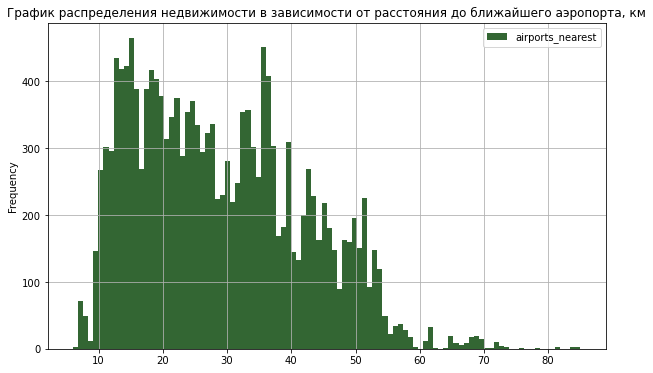

In [86]:
ax = data_clear_estate.plot(
    kind='hist',
    y='airports_nearest',
    range=(6, 85),
    bins=100,
    title='График распределения недвижимости в зависимости от расстояния до ближайшего аэропорта, км',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info"><b>Выводы</b>
<p><i>Минимальное расстояние до аэропорта - 6.45 км
<p>Максимальное расстояние до аэропорта - 84.87 км
<p>Среднее расстояние до аэропорта - 28.79 км
<p>75% недвижимости находится не далее, чем в 37.3 км от аэропорта
<p>Медиана - 26.7 км
<p>Гистограмма указывает, что наибольшее число недвижимости находится в 40 км от аэропорта, что может соответствовать городу Санкт-Петербургу и его пригородам
    
</i>
           <p><b>Нормальными параметрическими данными будем считать данные: расстояние до аэропорта от 6.45 км до 85 км , со средним значением 28.79 км и медианой 26.7 км </b>. 
</div>

##### Расстояние до ближайшего парка

<div class="alert alert-block alert-info">Описательная статистика для столбца 'parks_nearest' </div>

In [87]:
data_clear_estate['parks_nearest'].describe()

count    6804.000000
mean      494.828042
std       340.203029
min         1.000000
25%       293.000000
50%       458.000000
75%       618.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'parks_nearest' </div>

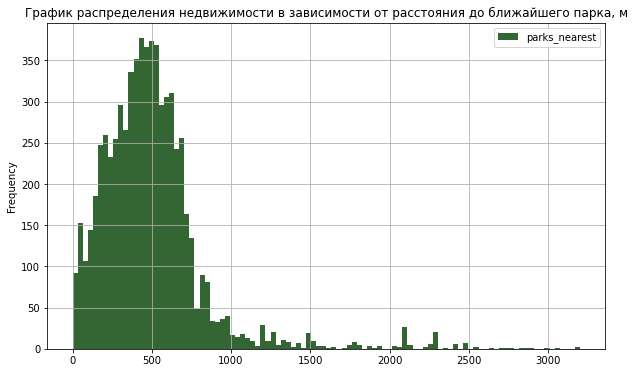

In [88]:
ax = data_clear_estate.plot(
    kind='hist',
    y='parks_nearest',
    range=(1, 3200),
    bins=100,
    title='График распределения недвижимости в зависимости от расстояния до ближайшего парка, м',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info"><b>Выводы</b>
<p><i>Минимальное расстояние до ближайшего парка - 1 м (жить в парке - хорошо, а владеть собственным - еще лучше!)
<p>Максимальное расстояние до ближайшего парка - 3.19 км
<p>Среднее расстояние до ближайшего парка - 491 м
<p>75% недвижимости находится не далее, чем в 612 м от ближайшего парка
<p>Медиана - 455 м
<p>Гистограмма указывает, что наибольшее число недвижимости находится в пределах 1 км до ближайшего парка
    
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: расстояние до ближайшего парка от 1 м до 3190 м, со средним значением 491 м и медианой 455 м </b>. 
</div>

##### День и месяц публикации объявления

<div class="alert alert-block alert-info">Построим столбчатую диаграмму по количеству объявлений в зависимости от дня недели </div>

Text(0, 0.5, 'Frequency')

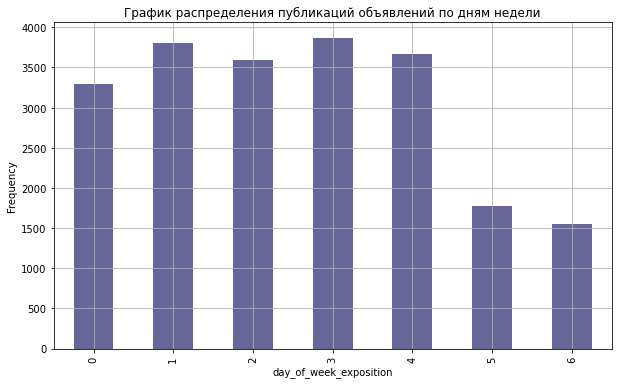

In [89]:
ax = (data_clear_estate.groupby('day_of_week_exposition')['last_price'].count().plot
        .bar(
            title='График распределения публикаций объявлений по дням недели',
            grid=True, 
            figsize=(10, 6),
            color='#666699'
            )
    )
# переименование оси у
ax.set_ylabel('Frequency')

In [90]:
data_clear_estate.groupby('day_of_week_exposition')['last_price'].count()

day_of_week_exposition
0    3293
1    3804
2    3590
3    3868
4    3664
5    1778
6    1553
Name: last_price, dtype: int64

<div class="alert alert-block alert-info">Построим столбчатую диаграмму по количеству объявлений в зависимости от месяца </div>

Text(0, 0.5, 'Frequency')

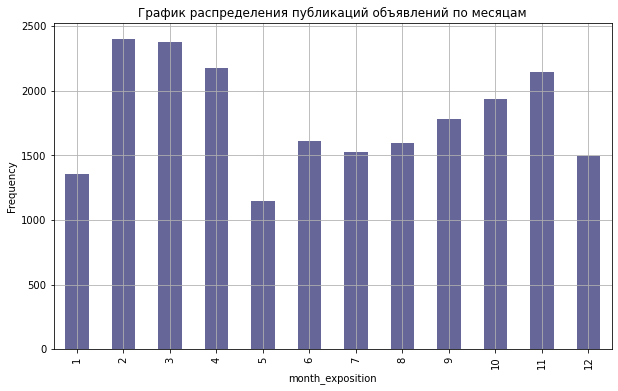

In [91]:
ax = (data_clear_estate.groupby('month_exposition')['last_price'].count().plot
        .bar(
            title='График распределения публикаций объявлений по месяцам',
            grid=True, 
            figsize=(10, 6),
            color='#666699'
            )
     )
# переименование оси у
ax.set_ylabel('Frequency')

In [92]:
data_clear_estate.groupby('month_exposition')['last_price'].count()

month_exposition
1     1358
2     2404
3     2380
4     2173
5     1147
6     1608
7     1523
8     1598
9     1782
10    1937
11    2147
12    1493
Name: last_price, dtype: int64

<div class="alert alert-block alert-info"><b>Выводы</b>
<p><i>Чаще всего объявления публикуются в рабочие дни (максимальное количество во вторник - 2650 и в четверг - 2647), в выходные объявления публикуются примерно в 2 раза реже (в субботу - 1157, в воскресенье - 1026)
<p>Меньше всего объявлений о продаже недвижимости - в мае (825), а наибольшее количество - в феврале (1624)
</i></div>

In [93]:
# проверка количества удаленных данных в датафрейме data_clear_estate относительно исходных данных
print('Удалено данных в качестве выбросов {:.2%}'.format(1 - len(data_clear_estate) / len(data)))


Удалено данных в качестве выбросов 9.07%


#### Изучение параметра, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление

<div class="alert alert-block alert-info">Столбец 'days_exposition' содержит пропуски данных, которые могут означать, что объявление еще не снято с публикации, следовательно, недвижимость не продалась. Сделаем фильтр по данным без этих пропусков </div>

In [94]:
#сравнение столбца с самим собой вернет всё, кроме Nan
data_days_exposition = data_clear_estate.query('days_exposition == days_exposition', engine='python')

<div class="alert alert-block alert-info">Построим гистограмму для столбца 'days_exposition' </div>

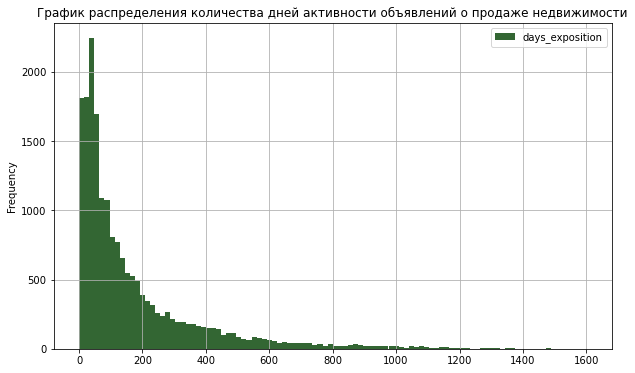

In [95]:
ax = data_days_exposition.plot(
    kind='hist',
    y='days_exposition',
    range=(0, 1600),
    bins=100,
    title='График распределения количества дней активности объявлений о продаже недвижимости',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">Описательная статистика для столбца 'days_exposition' датасета data_days_exposition </div>

In [96]:
data_days_exposition['days_exposition'].describe()

count    18876.000000
mean       172.246609
std        210.557704
min          1.000000
25%         44.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-block alert-info"> Описательная статистика указывает на неоднородность данных (стандартное отклонение в 213 дней от среднего - т.е. есть недвижимость, которая продавалась очень быстро и есть та, которая продавалась очень долго)
<p> Среднее количество дней "жизни" объявления - 176, а медиана - 96, т.е. данные имеют выбросы, при этом минимальный срок составил 1 день, а максимальный - 1580 дней (4 года и 3 месяца).
</div>

<div class="alert alert-block alert-info">Построим диаграмму размаха, чтобы оценить выбросы </div>

<AxesSubplot:>

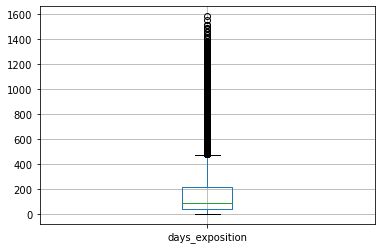

In [97]:
data_days_exposition.boxplot('days_exposition')

<div class="alert alert-block alert-info">Нижний «ус» упирается в 1, минимальное значение. Верхний заканчивается около 500 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений. Избавимся от аномальных данных, продолжив работу с данными, удовлетворяющими следующему условию:</div>

In [98]:
data_days_exposition = data_days_exposition.query('days_exposition < 500', engine='python')
data_days_exposition['days_exposition'].describe()

count    17424.000000
mean       124.028409
std        117.737793
min          1.000000
25%         40.000000
50%         80.000000
75%        176.000000
max        499.000000
Name: days_exposition, dtype: float64

<div class="alert alert-block alert-info">Обновленная статистика выглядит лучше и указывает на то, что большинство продаж осуществляются в течение 5 месяцев</div>

In [99]:
# доля проданных квартир за первые 200 дней
len(data_days_exposition.query('days_exposition < 200', engine='python')) / len(data_days_exposition['days_exposition'])

0.7883953168044077

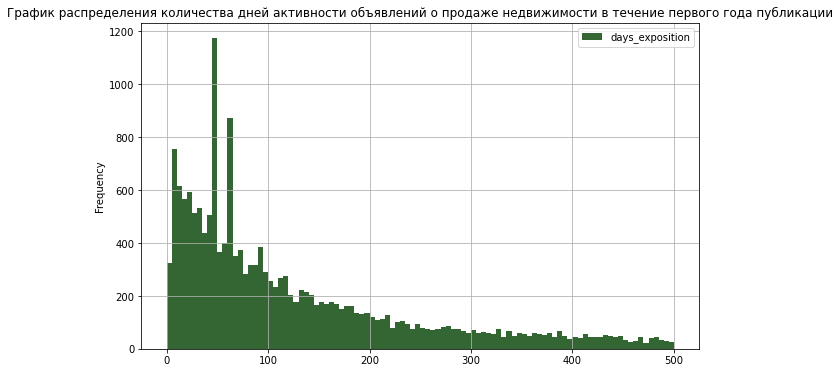

In [100]:
ax = data_days_exposition.plot(
    kind='hist',
    y='days_exposition',
    range=(0, 500),
    bins=100,
    title='График распределения количества дней активности объявлений о продаже недвижимости в течение первого года публикации',
    grid=True,
    figsize=(10, 6),
    color='#336633'
)

<div class="alert alert-block alert-info">Обновленная гистограмма позволяет отнести к быстрым продажам объявления с 'days_exposition'= 85, за 200 дней продается порядка 78% недвижимости,  к необычно долгим отнесем срок в 200 и более дней </div>

<div class="alert alert-block alert-info"><b>Выводы</b>
<p><i>Среднее время продажи 126 дня, медиана - 85 дня. Быстрые продажи осуществляются до 85 дней, к необычайно долгим отнесем продажи свыше 200 дней. Большинство продаж осуществляются в течение 7 месяцев
"Рекордсмен" среди данных с аномалиями срок в  1553 дней (4 года и 2 месяца).
</i>
    <p><b>Нормальными параметрическими данными будем считать данные: количество дней публикации объявления от 1 до 500, со средним значением 126 и медианой 85 дней </b>. 
</div>

#### Влияние факторов на общую (полную) стоимость объекта

<div class="alert alert-block alert-info">Прежде чем исследовать зависимость стоимости объекта от различных факторов, избавим данные от аномальных значений. Ограничения выберем согласно диаграмме размаха и данным из раздела 2.</div>


In [101]:
# срез по количеству комнат оставим от 1 до 5
data_clear_estate_new = data_clear_estate.query('rooms in [1, 2, 3, 4, 5]')

In [102]:
# проверка пропусков значений
data_clear_estate_new.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment              18849
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
airports_nearest           5349
cityCenters_nearest        5334
parks_around3000           5333
parks_nearest             14584
ponds_around3000           5333
ponds_nearest             13629
days_exposition            2660
locality_type                 0
locality_simple_name          0
one_meter_price               0
day_of_week_exposition        0
month_exposition              0
year_exposition               0
flat_floor_type               0
cityCenters_nearest_km     5334
dtype: int64

In [103]:
# проверка количества удаленных данных в датафрейме data_clear_estate_new относительно исходных данных
print('Удалено данных в качестве выбросов {:.2%}'.format(1 - len(data_clear_estate_new) / len(data)))


Удалено данных в качестве выбросов 9.86%


##### Площадь vs Стоимость

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

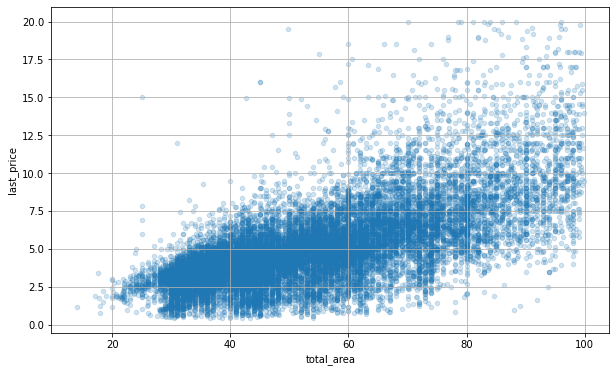

In [104]:
# диаграмма рассеяния - зависимость цены от общей площади 
data_clear_estate_new.plot(x='total_area', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(10, 6))

In [105]:
# вычисление коэффициента корреляции
data_clear_estate_new['last_price'].corr(data_clear_estate_new['total_area'])

0.6855997234348932

<div class="alert alert-block alert-info">По диаграмме рассеяния можно увтерждать, что зависимость есть и она может описываться линейным уравнение, но коэффициент корреляции в 0.69 показывает, что зависимость цены объекта от общей площади средняя

##### Жилая площадь vs Стоимость

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

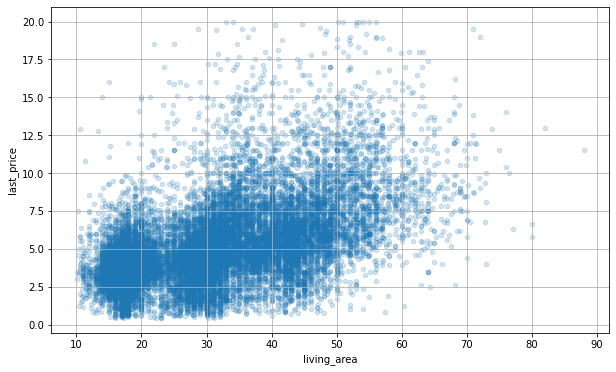

In [106]:
# диаграмма рассеяния - зависимость цены от жилой площади 
data_clear_estate_new.plot(x='living_area', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(10, 6))

In [107]:
# вычисление коэффициента корреляции
data_clear_estate_new['last_price'].corr(data_clear_estate_new['living_area'])

0.5414203054827317

<div class="alert alert-block alert-info">По диаграмме рассеяния можно утверждать - есть средняя зависимость, что подтверждает коэффициент корреляции в 0.54</div>

##### Площадь кухни vs Стоимость

<div class="alert alert-block alert-info">Вначале оценим зависимость цены объекта от доли площади кухни относительно общей площади (кто-то хочет большие комнаты и маленькую кухню, для кого-то большая кухня - приоритет)

In [108]:
# столбец kitchen_percent - доля площади кухни относительно общей площади
data_clear_estate_new['kitchen_percent'] = data_clear_estate_new['kitchen_area'] / data_clear_estate_new['total_area']

<AxesSubplot:xlabel='kitchen_percent', ylabel='last_price'>

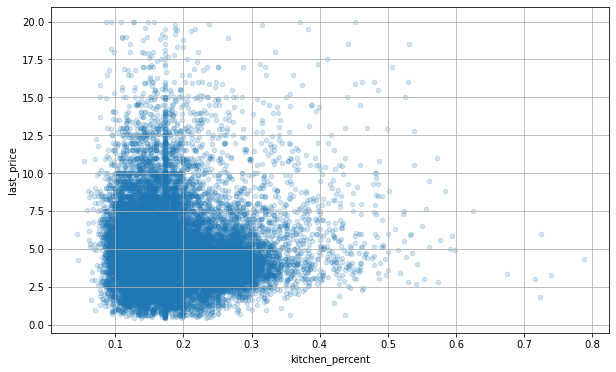

In [109]:
# диаграмма рассеяния - зависимость цены от доли кухни в квартире
data_clear_estate_new.plot(x='kitchen_percent', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(10, 6))

In [110]:
# вычисление коэффициента корреляции
data_clear_estate_new['last_price'].corr(data_clear_estate_new['kitchen_percent'])

-0.055729851699656247

<div class="alert alert-block alert-info">По диаграмме рассеяния можно утверждать, что зависимости нет, коэффициент корреляции в -0.055 это подтверждает, т.е.  у покупателей стандартные предпочтения доли кухни относительно общей площади - от 10% до 30% </div>

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

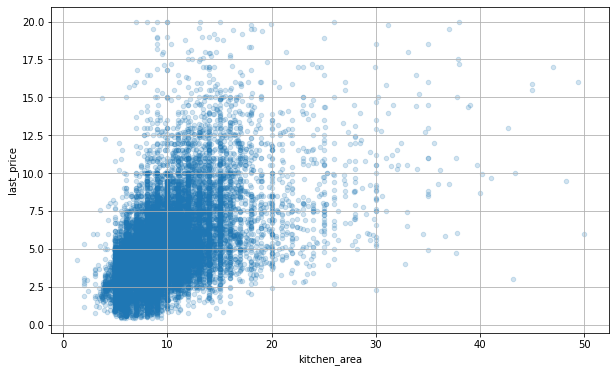

In [111]:
# диаграмма рассеяния - зависимость цены площади кухни в квартире
data_clear_estate_new.plot(x='kitchen_area', y='last_price', grid=True, kind='scatter', alpha=0.2, figsize=(10, 6))

In [112]:
# вычисление коэффициента корреляции
data_clear_estate_new['last_price'].corr(data_clear_estate_new['kitchen_area'])

0.5226069409367851

<div class="alert alert-block alert-info">Если же оценивать метраж кухни относительно стоимости, что здесь есть средняя зависимость, что подтверждает коэффициент корреляции в 0.52 </div>

##### Количество комнат vs Стоимость

<div class="alert alert-block alert-info">Оценим, как меняется стоимость квартиры относительно количества комнат, дополнительным показателем возьмем стоимость одного квадртаного метра

In [113]:
# сводная таблица по количеству комнат и средней общей цены / средней цены кв.м
data_clear_estate_pt = (
    data_clear_estate_new.
    pivot_table(index=['rooms'], values=['one_meter_price','last_price'], aggfunc=['mean'])
)
# переименование столбцов
data_clear_estate_pt.columns = ['total_avg_price', 'one_meter_avg_price']
# вывод с сортировкой по количеству комнат
data_clear_estate_pt.sort_values('rooms')

,total_avg_price,one_meter_avg_price
rooms,,
1,3.790416,100146.115224
2,5.264985,93128.726191
3,6.344069,87448.790542
4,6.436882,82352.320912
5,7.169394,83440.771212


Text(0, 0.5, 'AVG_price')

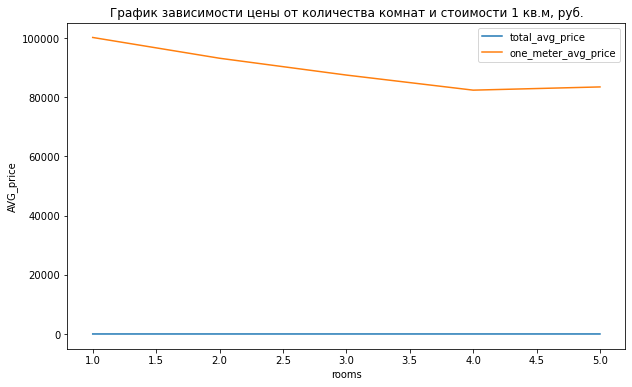

In [114]:
# вывод графика
ax = data_clear_estate_pt.plot(title='График зависимости цены от количества комнат и стоимости 1 кв.м, руб.', figsize=(10, 6))
# переименование оси у
ax.set_ylabel('AVG_price')

In [115]:
# вычисление коэффициента корреляции зависимости цены от количества комнат
data_clear_estate_new['last_price'].corr(data_clear_estate_new['rooms'])

0.3859019281621988

<div class="alert alert-block alert-info">1 кв. м квартиры меньшего размера стоит несколько дороже метра квадратного квартиры большего размера. Так, 1 кв. м однокомнатных квартир будет стоить дороже 2-комнатных, а те, в свою очередь, дороже 3-комнатных. Поэтому при оценке квартир нужно подбирать аналогичные варианты с одинаковым количеством комнат. Коэффициент корреляции 0.39 зависимости цены объекта от количества комнат указывает, что зависимость слабая, при этом при увеличении числа комнат цена объекта растет, а цена одного кв.м дешевее</div>

##### Этаж (Первый, последний, другой) vs Стоимость

<div class="alert alert-block alert-info">Представим данные в сводной таблице, где укажем среднюю стоимость квартиры относительно этажа </div>

In [116]:
# сводная таблица 
data_clear_estate_pt = (
    data_clear_estate_new.
    pivot_table(index=['flat_floor_type'], values='last_price', aggfunc=['mean'])
)
# переименование столбцов
data_clear_estate_pt.columns = ['avg_price']
# вывод с сортировкой по цене
data_clear_estate_pt.sort_values('avg_price')

,avg_price
flat_floor_type,
первый,4.151586
последний,4.619984
другой,5.230401


Text(0, 0.5, 'AVG_price')

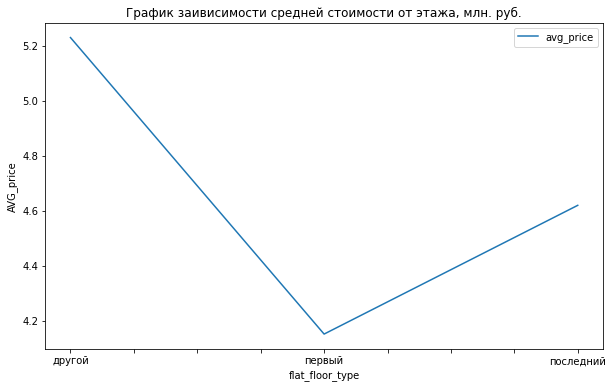

In [117]:
ax = data_clear_estate_pt.plot(title='График заивисимости средней стоимости от этажа, млн. руб.', figsize=(10, 6))
# переименование оси у
ax.set_ylabel('AVG_price')

<div class="alert alert-block alert-info">Квартиры, расположенные на первом этаже обычно либо значительно дороже (зависит от расположения дома и от возможности использовать (перевести) помещение под коммерческие цели), либо процентов на 5-10 дешевле из-за: сырости и холода, близкой парковки и прочих "радостей" под окнами, шума с улицы  и проч.
Последний этаж, как правило - дешевле остальных. Жить на последнем этаже не всегда комфортно, так как здесь возможны некоторые проблемы с крышей и потолками (протекание воды от дождя и танущего снега, а значит сырость и плесень в квартире), летом – жаркий и душный воздух от накалившейся крыши (особенно если в доме нет чердака). К тому же в старых домах могут ломаться лифты.
Остальные этажи в многоквартирном доме - в одной цене. Конечно, исключения составляют те верхние этажи в новых эксклюзивных домах, из окон квартир которых открываются потрясающие пейзажи (так называемые видовые квартиры), ну и конечно, пентхаузы и многоуровневые квартиры. Они, понятное дело, дороже. Причём стоимость таких квартир может отличаться в разы</div>


##### Дата размещения (день недели, месяц, год) vs Стоимость

Text(0, 0.5, 'AVG_price')

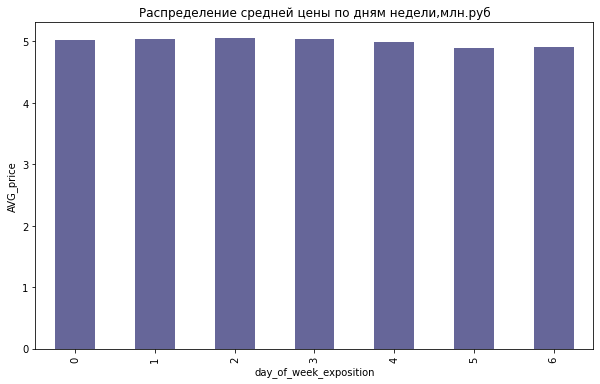

In [118]:
# группировка по дню недели
ax = data_clear_estate_new.groupby('day_of_week_exposition')['last_price'].mean().plot\
                .bar(title='Распределение средней цены по дням недели,млн.руб', figsize=(10, 6), color='#666699')
# переименование оси у
ax.set_ylabel('AVG_price')

<div class="alert alert-block alert-info">Средняя цена не зависит от дня недели публикации объявления  практически одинакова в любой день
 </div>

Text(0, 0.5, 'AVG_price')

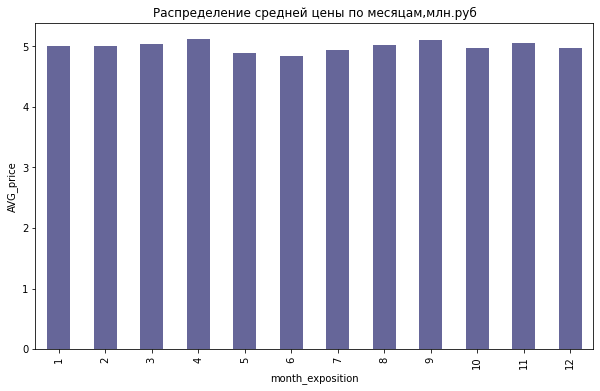

In [119]:
# группировка по месяцам
ax = data_clear_estate_new.groupby('month_exposition')['last_price'].mean().plot\
            .bar(title='Распределение средней цены по месяцам,млн.руб', figsize=(10, 6), color='#666699')
# переименование оси у
ax.set_ylabel('AVG_price')

<div class="alert alert-block alert-info">Средняя цена практически не зависит от месяца публикации объявления, отличается только апрель - в этом месяце средняя цена наивысшая и июнь - здесь наименьшая
 </div>

Text(0, 0.5, 'AVG_price')

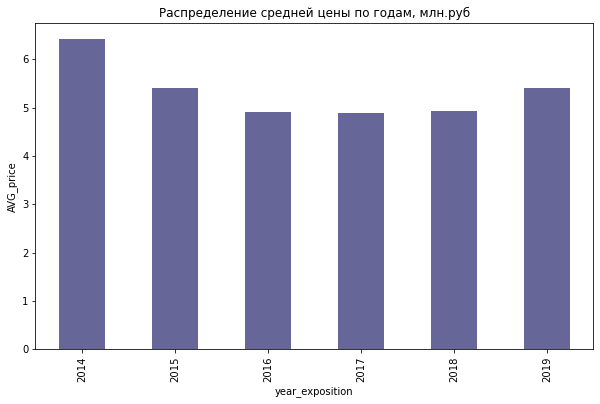

In [120]:
# группировка по годам
ax = data_clear_estate_new.groupby('year_exposition')['last_price'].mean().plot\
            .bar(title='Распределение средней цены по годам, млн.руб', figsize=(10, 6), color='#666699')
# переименование оси у
ax.set_ylabel('AVG_price')

In [121]:
# сводная таблица 
data_clear_estate_pt = (
    data_clear_estate_new.
    pivot_table(index=['year_exposition'], values='last_price', aggfunc=['mean', 'count'])
)
# переименование столбцов
data_clear_estate_pt.columns = ['avg_price', 'total_exposition']
data_clear_estate_pt

,avg_price,total_exposition
year_exposition,,
2014,6.427619,94
2015,5.398529,988
2016,4.911026,2476
2017,4.900600,7339
2018,4.938729,7830
2019,5.399900,2635


<div class="alert alert-block alert-info">Самым влиятельным временным фактором на среднюю цену является год (влияют как и экономические, так и политические факторы). Наибольшая средняя цена 6.42 млн. руб. была в 2014 году, но объявлений о продаже было всего 94. В 2015-2018 годах средняя цена была наименьшей при большом количестве объявлений. Следовательно, количество предложений имеет большее влияние на среднюю цену, чем год</div>

<div class="alert alert-block alert-info"><b>Выводы</b>
<p>Были рассмотрены следующие факторы, имеющие возможное влияние на стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, дата размещения (день, месяц, год).  Рассмотрим их в порядке убывания влияния на стоимость объекта:
 
 <li><i>Общая площадь</i>. Коэффициент корреляции 0.69 - зависимость средняя, диаграмма рассеяния близка к линейной зависимости
 <li><i>Этаж.</i> Влиятельный признак. Предпочтительным является ни первый и не последний этажи (первый - шумный, холодный, темный и проч., последний - проблемы с лифтом, крышей и проч.)
 <li><i>Жилая площадь</i>. Коэффициент корреляции 0.54 - зависимость среднняя, диаграмма рассеяния имеет несколько плотных областей без какой-либо зависимости</i>
 <li><i>Площадь кухни (доля площади кухни от общей площади)</i>.  Коэффициент корреляции 0.52 - зависимость средняя, диаграмма рассеяния имеет плотную область от 5 до 15 кв.м (у покупателей стандартные предпочтения доли кухни относительно общей площади - от 10% до 30%)
    <li><i>Количество комнат</i>. Коэффициент корреляции 0.39 зависимости цены объекта от количества комнат указывает, что зависимость слабая, при этом при увеличении числа комнат цена объекта растет, а цена одного кв.м дешевеет (средняя цена 1 кв.м в однокомнатной квартире 100 тыс. руб, а в четырехкомнатной - 82 тыс. руб.) </i>
 <li><i>Дата размещения (день недели, месяц, год)</i>. День недели не оказывает влияние на цену; объявления, размещенные в апреле в среднем имеют большую среднюю цену, а в июне - наименьшую (отличия от остальных месяцев несущественные); наибольшее влияния из временных факторов имеет год в связке с количеством объявлений (чем меньше было объявлений, тем выше была средняя цена)
</div>

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [122]:
# сводная таблица по количеству предложений и средней цены 1 кв.м десяти популярных населенных пунктов
data_clear_estate_pt = data_clear_estate_new.pivot_table(index='locality_simple_name',\
                                                     values='one_meter_price', aggfunc=['count', 'mean'])
# переименование столбцов
data_clear_estate_pt.columns = ['total_exp', 'avg_price_one_meter']
# вывод с сортировкой по убыванию количества объявлений
data_clear_estate_pt.sort_values('total_exp', ascending=False).head(10)

,total_exp,avg_price_one_meter
locality_simple_name,,
Санкт-Петербург,13676,108549.218407
Мурино,555,85355.103441
Кудрово,446,95040.515426
Шушары,425,78407.674235
Всеволожск,384,67031.852396
Пушкин,336,101259.342054
Колпино,332,75322.233735
Парголово,320,90613.495437
Гатчина,301,68938.456944


<div class="alert alert-block alert-info"><b>Выводы</b>
<p>Среди 10 населенных пунктов с наибольшим числом объявлений самая высокая цена квадратного метра в Санкт-Петербурге - <i>108549 руб. (число объявлений 13676)</i>, а самая низкая в Выборге - <i>58212 руб. (число объявлений 221)</i></div>

####  Cредняя цена каждого километра от объекта до центра по Санкт-Петербургу

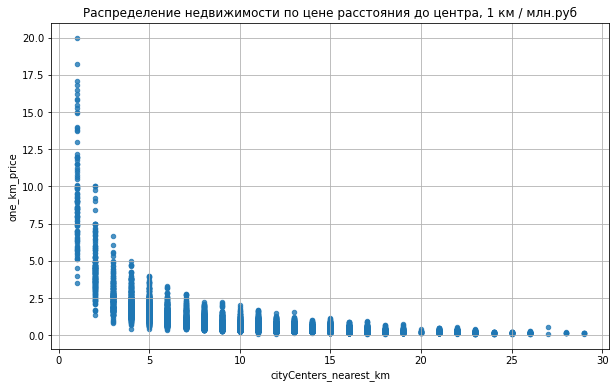

In [123]:
# срез данных: город Санкт-Петербург, нет пропущенных значений в столбце cityCenters_nearest_km
data_clear_estate_spb = data_clear_estate_new.query('locality_simple_name == "Санкт-Петербург"\
                                                and cityCenters_nearest_km == cityCenters_nearest_km')
# вычисление стоимости одного км от объекта до центра
data_clear_estate_spb['one_km_price'] = round(data_clear_estate_spb['last_price']\
                                              / data_clear_estate_spb['cityCenters_nearest_km'], 2)
# диаграмма рассеяния - зависимость цены 1 км от расстояния до центра 
ax = data_clear_estate_spb.plot(x='cityCenters_nearest_km', y='one_km_price', grid=True, kind='scatter', alpha=0.8,  \
                               figsize=(10, 6), title='Распределение недвижимости по цене расстояния до центра, 1 км / млн.руб')

In [124]:
# вычисление коэффициента корреляции расстояния до центра от центы объекта
data_clear_estate_spb['cityCenters_nearest_km'].corr(data_clear_estate_spb['last_price'])

-0.3822594399686005

<div class="alert alert-block alert-info"><b>Выводы</b>
<p>Можно утверждать, что, чем ближе к центру недвижимость, тем дороже средняя цена 1 км до центра. Диаграмма рассеяния показывает, что, несмотря на то, что указанная выше зависимость выполняется, и в центре можно найти недорогую недвижимость, но ее крайне мало (как и недвижимости, близкой к центру). По другим расстояниям от 3 до 20 км - предложений много и с каждым км цена уменьшается.
<p>Коэффициент корреляции имеет отрицательную слабую связь -0.38

### Общий вывод

<div class="alert alert-block alert-info"> <b>1. Предобработка данных</b>
    <p><i>1.1 Поиск, анализ и заполнение пропусков в данных</i>
    <p>Пропуски <b>не заполнялись</b> в столбцах:
    <p>•  Всего этажей (floors_total) - в данных нет адреса, заполнить пропуск можно только по запросу к собственнику, возможно, эта информация не является важной для анализа
    <p>•  Название населённого пункта (locality_name) - заполнить пропуск можно только по запросу к собственнику, при анализе зависимости, связанной с населенным пунктом, данные с пропуском будут исключены
    <p>•  Расстояние до ближайшего аэропорта в метрах (м) (airports_nearest) - возможно заполнить, используя средние данные из совпадающих населенных пунктов, но других данных для стат.анализа достаточно, пропуски использовать не будем
    <p>•  Расстояние до центра города, парки и озера в округе (м) (cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) - в данных нет адреса, даже картографически данные заполнить не получится
    <p>•  Количество дней размещения объявления (days_exposition) - Nan может означать, что объявление всё еще размещено
    <p>•  Апартаменты (is_apartment) – заполнены на 12%, в будущем возможен дополнительный анализ по классификации недвижимости для заполнения этого признака
        <br>
        <br>
    <p>Пропуски <b>заполнены</b> в столбцах:
<p>•Балокны (balcony) – NaN заменен на нулю
<p>•Высота потолков(м) (ceiling_height) – заполнены медианным значением в зависимости этажности недвижимости после обработки аномалий 
<p>•Площадь кухни и жилая площадь – заполнены с учетом медианного коэффициента площади к общей площади
        <br>
        <br>
    
<p>Удаление <b>дубликатов</b> в столбце Название населённого пункта (locality_name)
   Пропуски заполнены на 'unknown', произведена замена и объединение типов населенных пунктов.
    <p>Данные разбиты на два столбца  <i>Тип населенного пункта (locality_type)</i> и <i>Название населенного пункта(locality_simple_name)</i>, для этого реализованы функции <i>categorize_locality_name</i> ( возвращает тип населенного пункта [город, деревня, пгт, садовое товарищество, поселок, село]) и <i>simple_locality_name</i> (возвращает «чистое» название населенного пункта). Функция <i>list_of_duplicate_locality_name</i> возвращает список множеств дубликатов (всего было найдено 12 дубликатов названий, имеющих разный тип населенного пункта, дубликатами признаны названия Рябово, Гарболово, Щеглово, Фёдоровское, остальные названия, согласно Википедии, относятся к различным типам населенных пунктов с одинаковыми названиями)

      
 </div>

<div class="alert alert-block alert-info"> <b>2. Добавление новых столбцов</b>
    <p>В таблицу добавлены новые столбцы:
<p>•	цена одного квадратного метра (one_meter_price)
<p>•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) (day_of_week_exposition)
<p>•	месяц публикации объявления (month_exposition)
<p>•	год публикации объявления (year_exposition)
<p>•	тип этажа квартиры (значения — «первый», «последний», «другой») (flat_floor_type), реализована функция floor_type, возвращающая тип квартиры
<p>•	расстояние до центра города в километрах (cityCenters_nearest_km)
</div>

<div class="alert alert-block alert-info"><b>3. Исследовательский анализ данных</b>
    <p><i>3.1 Скорость продажи квартиры</i>
        
   <p>Среднее время продажи 126 дня, медиана - 85 дня. Быстрые продажи осуществляются до 85 дней, к необычайно долгим отнесем продажи свыше 200 дней. Большинство продаж осуществляются в течение 7 месяцев. "Рекордсмен" среди данных с аномалиями срок в 1553 дней (4 года и 2 месяца). 
       <p><i>Нормальными параметрическими данными будем считать данные: количество дней публикации объявления от 1 до 500, со средним значением 126 и медианой 85 дней</i>.</div>

<div class="alert alert-block alert-info"> <p><i>3.2 Параметры объектов </i>
<p>Нормальными параметрическими данными будем считать данные:
    <p>•	Общая площадь от 12 до 100 кв.м со средним значением 52.8 кв.м (медиана 49.7 кв. м).

<p>• Жилая площадь от 10 до 88 кв.м со средним значением 30.2 кв.м (медиана 29.2 кв. м)
<p>•	Площадь кухни от 1.3 до 50 кв.м со средним значением 9.6 кв.м (медиана 9 кв. м)
<p>•	Цена объекта от 0.43 до 20 млн. руб. со средним значением 5 млн. руб. (медиана 4.45 млн. руб)
<p>•	Количество комнат от 0 до 5, со средним значением и медианой 2 комнаты
<p>•	Высота потолков от 2.4 до 5.8 м, со средним значением 2.77 м и медианой 2.8 м
<p>•	Этаж квартиры от 1 до 33, со средним значением 6 и медианой 4 этажа
<p>•	Тип этажа квартиры («первый», «последний», «другой»). Первый и последний этаж встречаются примерно одинаково редко, наиболее распространёнными являются этажи категории Другие
<p>•	Общее количество этажей в доме от 1 до 29, со средним значением 10 и медианой 9 этажей.
<p>•	Расстояние до центра города в метрах от 208 м до 29493 м (по Сантк-Петербургу), со средним значением 12.1 км и медианой 12.6 км 
<p>•	Расстояние до ближайшего аэропорта от 6.45 км до 85 км, со средним значением 28.79 км и медианой 26.7 км 
<p>•	Расстояние до ближайшего парка от 1 м до 3190 м, со средним значением 491 м и медианой 455 м 
<p>•	День и месяц публикации объявления. Чаще всего объявления публикуются в рабочие дни (максимальное количество во вторник - 2650 и в четверг - 2647), в выходные объявления публикуются примерно в 2 раза реже (в субботу - 1157, в воскресенье - 1026)
Меньше всего объявлений о продаже недвижимости - в мае (825), а наибольшее количество - в феврале (1624)


<div class="alert alert-block alert-info">
    <p><i>3.3 Влияние факторов на стоимость объекта</i>
<p>Были рассмотрены следующие факторы, имеющие возможное влияние на стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, дата размещения (день, месяц, год).  Рассмотрим их в порядке убывания влияния на стоимость объекта:
 
 <li><i>Общая площадь</i>. Коэффициент корреляции 0.69 - зависимость средняя, диаграмма рассеяния близка к линейной зависимости
 <li><i>Этаж.</i>Влиятельный признак. Предпочтительным является ни первый и не последний этажи (первый - шумный, холодный, темный и проч., последний - проблемы с лифтом, крышей и проч.), разница между средней стоимостью квартиры на первом этаже и на другом этаже - 1.06 млн. руб.
 <li><i>Жилая площадь</i>. Коэффициент корреляции 0.54 - зависимость среднняя, диаграмма рассеяния имеет несколько плотных областей без какой-либо зависимости</i>
 <li><i>Площадь кухни (доля площади кухни от общей площади)</i>.  Коэффициент корреляции 0.52 - зависимость средняя, диаграмма рассеяния имеет плотную область от 5 до 15 кв.м (у покупателей стандартные предпочтения доли кухни относительно общей площади - от 10% до 30%)
    <li><i>Количество комнат</i>. Коэффициент корреляции 0.39 зависимости цены объекта от количества комнат указывает, что зависимость слабая, при этом при увеличении числа комнат цена объекта растет, а цена одного кв.м дешевеет (средняя цена 1 кв.м в однокомнатной квартире 100 тыс. руб, а в четырехкомнатной - 82 тыс. руб.) </i>
 <li><i>Дата размещения (день недели, месяц, год)</i>. День недели не оказывает влияние на цену; объявления, размещенные в апреле в среднем имеют большую среднюю цену, а в июне - наименьшую (отличия от остальных месяцев несущественные); наибольшее влияния из временных факторов имеет год в связке с количеством объявлений (чем меньше было объявлений, тем выше была средняя цена)</div>


<div class="alert alert-block alert-info">
    <p><i>3.4 Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</i>
<p>Среди 10 населенных пунктов с наибольшим числом объявлений самая высокая цена квадратного метра в Санкт-Петербурге - <i>108549 руб. (число объявлений 13676)</i>, а самая низкая в Выборге - <i>58212 руб. (число объявлений 221)</i>
    <br><br>
    <p><i>3.5 Cредняя цена каждого километра от объекта до центра по Санкт-Петербургу</i>
 <p>Можно утверждать, что, чем ближе к центру недвижимость, тем дороже средняя цена 1 км до центра. Диаграмма рассеяния показывает, что, несмотря на то, что указанная выше зависимость выполняется, и в центре можно найти недорогую недвижимость, но ее крайне мало (как и недвижимости, близкой к центру). По другим расстояниям от 3 до 20 км - предложений много и с каждым км цена уменьшается.
Коэффициент корреляции имеет отрицательную слабую связь -0.38  </div>


<div class="alert alert-block alert-info"> <b>Медианная по параметрам недвижимость представляет собой:</b>
<li>Цена: 4.45 млн. руб.
<li>Площадь: общая 49.7 кв. м, жилая 29.2 кв. м, кухня 9 кв. м
<li>Количество комнат: 2
<li>Высота потолков: 2.77 м
<li>Этаж: не первый, не последний
<li>Количество этажей в доме: 9
<li>Расстояние до центра города: 12.6 км
<li>Расстояние до ближайшего аэропорта: 26.7 км
<li>Расстояние до ближайшего парка: 455 м
<li>Расположение: Санкт-Петербург и пригород
<p><b>В результате преобразований удаленнные данные из исходного датафрейма не превысили 10%</b>